In [67]:
import sqlite3
import pandas as pd
import pandas.io.sql as pd_sql
import numpy as np
import datetime, time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.svm import LinearSVC , SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, confusion_matrix , roc_auc_score, roc_curve, accuracy_score
import xgboost as xgb
%matplotlib inline

#### Reading the dataframe pickled in previous notebook after cleaning and EDA

In [3]:
fire_clean_model_df = pd.read_pickle("./fire_clean_model.pkl")

In [4]:
fire_clean_model_df.head()

,DISCOVERY_DOY,FIRE_SIZE,LATITUDE,LONGITUDE,STATE,CAUSE_LABEL,AK,AL,AR,AZ,...,WA,WI,WV,WY,DAYS_TO_CONT,SEASON,fall,spring,summer,winter
1,133,0.25,38.933056,-120.404444,CA,0,0,0,0,0,...,0,0,0,0,0,spring,0,1,0,0
2,152,0.10,38.984167,-120.735556,CA,1,0,0,0,0,...,0,0,0,0,0,spring,0,1,0,0
3,180,0.10,38.559167,-119.913333,CA,0,0,0,0,0,...,0,0,0,0,5,summer,0,0,1,0
4,180,0.10,38.559167,-119.933056,CA,0,0,0,0,0,...,0,0,0,0,5,summer,0,0,1,0
5,182,0.10,38.635278,-120.103611,CA,0,0,0,0,0,...,0,0,0,0,1,summer,0,0,1,0


In [5]:
fire_clean_model_df.columns

Index(['DISCOVERY_DOY', 'FIRE_SIZE', 'LATITUDE', 'LONGITUDE', 'STATE',
       'CAUSE_LABEL', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE',
       'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD',
       'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', 'DAYS_TO_CONT', 'SEASON',
       'fall', 'spring', 'summer', 'winter'],
      dtype='object')

#### Create X & Y subsets from dataframe

In [6]:
X = fire_clean_model_df.drop(['CAUSE_LABEL'], axis = 1)

In [7]:
Y = fire_clean_model_df['CAUSE_LABEL']

In [34]:
X.columns

Index(['DISCOVERY_DOY', 'FIRE_SIZE', 'LATITUDE', 'LONGITUDE', 'STATE', 'AK',
       'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA',
       'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO',
       'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK',
       'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA',
       'WI', 'WV', 'WY', 'DAYS_TO_CONT', 'SEASON', 'fall', 'spring', 'summer',
       'winter'],
      dtype='object')

#### Creating Train Test Validate Subsets

##### Subset for RandomForest/XGBoost/DecisionTree

In [52]:
X_rf = X.drop(['STATE','SEASON'], axis = 1)

In [53]:
X_rf.head()

,DISCOVERY_DOY,FIRE_SIZE,LATITUDE,LONGITUDE,AK,AL,AR,AZ,CA,CO,...,VT,WA,WI,WV,WY,DAYS_TO_CONT,fall,spring,summer,winter
1,133,0.25,38.933056,-120.404444,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,152,0.10,38.984167,-120.735556,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,180,0.10,38.559167,-119.913333,0,0,0,0,1,0,...,0,0,0,0,0,5,0,0,1,0
4,180,0.10,38.559167,-119.933056,0,0,0,0,1,0,...,0,0,0,0,0,5,0,0,1,0
5,182,0.10,38.635278,-120.103611,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [54]:
X_train_val_rf, X_test_rf, y_train_val_rf, y_test_rf = train_test_split(X_rf, Y, test_size=0.2)
X_train_rf, X_val_rf, y_train_rf, y_val_rf = train_test_split(X_train_val_rf, y_train_val_rf, test_size=.25)

##### Subset for LogisticReg

In [12]:
X_lr = X.drop(['DISCOVERY_DOY','LATITUDE','LONGITUDE','STATE','SEASON'], axis = 1)

In [13]:
X_lr.head()

,FIRE_SIZE,AK,AL,AR,AZ,CA,CO,CT,DC,DE,...,VT,WA,WI,WV,WY,DAYS_TO_CONT,fall,spring,summer,winter
1,0.25,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.10,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.10,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,5,0,0,1,0
4,0.10,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,5,0,0,1,0
5,0.10,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [14]:
X_train_val_lr, X_test_lr, y_train_val_lr, y_test_lr = train_test_split(X_lr, Y, test_size=0.2)
X_train_lr, X_val_lr, y_train_lr, y_val_lr = train_test_split(X_train_val_lr, y_train_val_lr, test_size=.25)

#### Initial knn model

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn.fit(X_train_lr, y_train_lr)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_train_lr, y_train_lr)))
print("Test set: {:6.2f}%".format(100*knn.score(X_val_lr, y_val_lr)))

The score for kNN is


In [ ]:
print("kNN confusion matrix: \n\n", confusion_matrix(y_val_lr, knn.predict(X_val_lr)))

In [ ]:
knn_confusion = confusion_matrix(label_test, knn.predict(X_test))
plt.figure(dpi=100)
sns.heatmap(knn_confusion, cmap=plt.cm.Blues, annot=True, square=True,
           xticklabels=fire_clean_model_df.CAUSE_LABEL,
           yticklabels=fire_clean_model_df.CAUSE_LABEL)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('kNN confusion matrix');

In [ ]:
y_predict_knn = knn.predict(X_val_lr)
print("Default threshold:")
print("Precision: {},   Recall: {}".format(precision_score(y_val_lr, y_predict_knn), 
                                                     recall_score(y_val_lr, y_predict_knn)))

#### Initial Logistic Regression

In [15]:
logit = LogisticRegression(C = 1.0)
logit.fit(X_train_lr, y_train_lr)
print("The score for logistic regression is")
#score returns mean accuracy
print("Training: {:6.2f}%".format(100*logit.score(X_train_lr, y_train_lr)))
print("Test set: {:6.2f}%".format(100*logit.score(X_val_lr, y_val_lr)))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The score for logistic regression is
Training:  87.92%
Test set:  87.98%


In [16]:
y_predict_lr = logit.predict(X_val_lr)
precision_score(y_val_lr, y_predict_lr), recall_score(y_val_lr, y_predict_lr)

(0.9079469912803246, 0.9456701091183757)

In [53]:
# plt.figure(figsize=(16,5))
logit.predict_proba(X_val_lr)
# hist of class 1 probas

array([[0.01918614, 0.98081386],
       [0.0026446 , 0.9973554 ],
       [0.85236978, 0.14763022],
       ...,
       [0.31612797, 0.68387203],
       [0.65975394, 0.34024606],
       [0.01860638, 0.98139362]])

In [31]:
logit.classes_

array([0, 1])

In [17]:
print("Logistic confusion matrix: \n\n", confusion_matrix(y_val_lr, logit.predict(X_val_lr)))

Logistic confusion matrix: 

 [[ 34196  21325]
 [ 12084 210335]]


In [18]:
# for item in zip(X.columns, logit.coef_[0]):
#     print(item)

In [19]:
print(logit.coef_[0].shape)

(58,)


#### Initial Naive Bayes

In [21]:
nb = GaussianNB()
nb.fit(X_train_lr, y_train_lr)
nb.score(X_val_lr, y_val_lr)

0.8176836727351227

In [22]:
y_predict_nb = nb.predict(X_val_lr)
precision_score(y_val_lr, y_predict_nb), recall_score(y_val_lr, y_predict_nb)

(0.9541382410492358, 0.8111627154154996)

In [23]:
print("GaussianNB confusion matrix: \n\n", confusion_matrix(y_val_lr,  nb.predict(X_val_lr)))

GaussianNB confusion matrix: 

 [[ 46849   8672]
 [ 42001 180418]]


In [24]:
nb_B = BernoulliNB()
nb_B.fit(X_train_lr,y_train_lr)
nb_B.score(X_val_lr,y_val_lr)

0.8503525940850544

In [25]:
y_predict_nbb = nb_B.predict(X_val_lr)
precision_score(y_val_lr, y_predict_nbb), recall_score(y_val_lr, y_predict_nbb)

(0.9263678119724221, 0.8831979282345483)

In [26]:
print("BernoulliNB confusion matrix: \n\n", confusion_matrix(y_val_lr, nb_B.predict(X_val_lr)))

BernoulliNB confusion matrix: 

 [[ 39907  15614]
 [ 25979 196440]]


#### Initial SVM

In [10]:
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
svm_model.score(X_val, y_val)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8000251852917896

In [11]:
y_predict = svm_model.predict(X_val)
precision_score(y_val, y_predict), recall_score(y_val, y_predict)

(0.8000237471575372, 0.9999910052124794)

In [12]:
print("SVC Linear confusion matrix: \n\n", confusion_matrix(y_val, svm_model.predict(X_val)))

SVC Linear confusion matrix: 

 [[    10  55579]
 [     2 222349]]


In [ ]:
svm_rbf = SVC(gamma="auto")
svm_rbf.fit(X_train, y_train)
svm_rbf.score(X_val, y_val)

In [ ]:
y_predict = svm_rbf.predict(X_val)
precision_score(y_val, y_predict), recall_score(y_val, y_predict)

In [ ]:
print("SVC RBF confusion matrix: \n\n", confusion_matrix(y_val, svm_rbf.predict(X_val)))

In [ ]:
svm_poly = SVC(kernel="poly", gamma="auto")
svm_poly.fit(X_train, y_train)
svm_poly.score(X_val, y_val)

y_predict = svm_poly.predict(X_val)
precision_score(y_val, y_predict), recall_score(y_val, y_predict)

print("SVC Poly confusion matrix: \n\n", confusion_matrix(y_val, svm_poly.predict(X_val)))

#### Initial Decision Tree

In [55]:
decisiontree = DecisionTreeClassifier(max_depth=4)


decisiontree.fit(X_train_rf, y_train_rf)
decisiontree.score(X_val_rf, y_val_rf)

y_predict_dt = decisiontree.predict(X_val_rf)

print(precision_score(y_val_rf, y_predict_dt), recall_score(y_val_rf, y_predict_dt))

print("\n Decision confusion matrix: \n\n", confusion_matrix(y_val_rf, decisiontree.predict(X_val_rf)))

0.9051347617535761 0.9499124232859504

 Decision confusion matrix: 

 [[ 33738  22111]
 [ 11124 210967]]


#### Initial RandomForest

In [56]:
randomforest = RandomForestClassifier(n_estimators=100)


randomforest.fit(X_train_rf, y_train_rf)
randomforest.score(X_val_rf, y_val_rf)

y_predict_rf = randomforest.predict(X_val_rf)

print(precision_score(y_val_rf, y_predict_rf), recall_score(y_val_rf, y_predict_rf))

print("\n Random Forest confusion matrix: \n\n", confusion_matrix(y_val_rf, randomforest.predict(X_val_rf)))

0.9457234078306167 0.9629566258875866

 Random Forest confusion matrix: 

 [[ 43575  12274]
 [  8227 213864]]


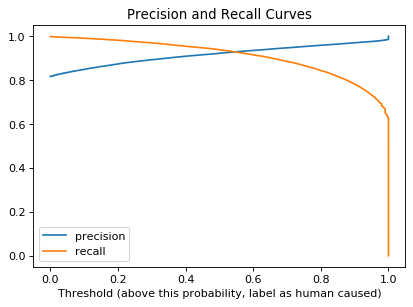

In [42]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_val, randomforest.predict_proba(X_val)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as human caused)');
plt.title('Precision and Recall Curves');

##### Feature Importance - RandomForest

In [94]:
print(list(zip(X_val_rf.columns, randomforest.feature_importances_)))

[('DISCOVERY_DOY', 0.27985492031158343), ('FIRE_SIZE', 0.16853934681759145), ('AK', 0.0037175611939843944), ('AL', 0.003927982164842918), ('AR', 0.0011073340319874441), ('AZ', 0.020923641065954124), ('CA', 0.00889622896598748), ('CO', 0.026135055964555554), ('CT', 0.00017713683985848188), ('DC', 2.8214765391105265e-06), ('DE', 2.234870266729783e-05), ('FL', 0.021063872774473646), ('GA', 0.008410207767896888), ('HI', 4.563732938502056e-05), ('IA', 8.626844661659509e-05), ('ID', 0.02256899228714975), ('IL', 0.00011904374406767788), ('IN', 0.00019826618004353206), ('KS', 0.0003040663464884796), ('KY', 0.000769918069891071), ('LA', 0.0023591576410361627), ('MA', 0.00020752875616819645), ('MD', 0.00028523099066022256), ('ME', 0.000558740060551243), ('MI', 0.0010302089832785102), ('MN', 0.0020199881927597287), ('MO', 0.0006001255400579307), ('MS', 0.004885211278906228), ('MT', 0.011289328661799845), ('NC', 0.004569197123314965), ('ND', 0.0012163667450625153), ('NE', 0.0007393658505179018), (

In [59]:
randomforest.predict_proba(X_val_rf.head(9))

array([[0.  , 1.  ],
       [0.96, 0.04],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.02, 0.98],
       [0.74, 0.26],
       [0.02, 0.98]])

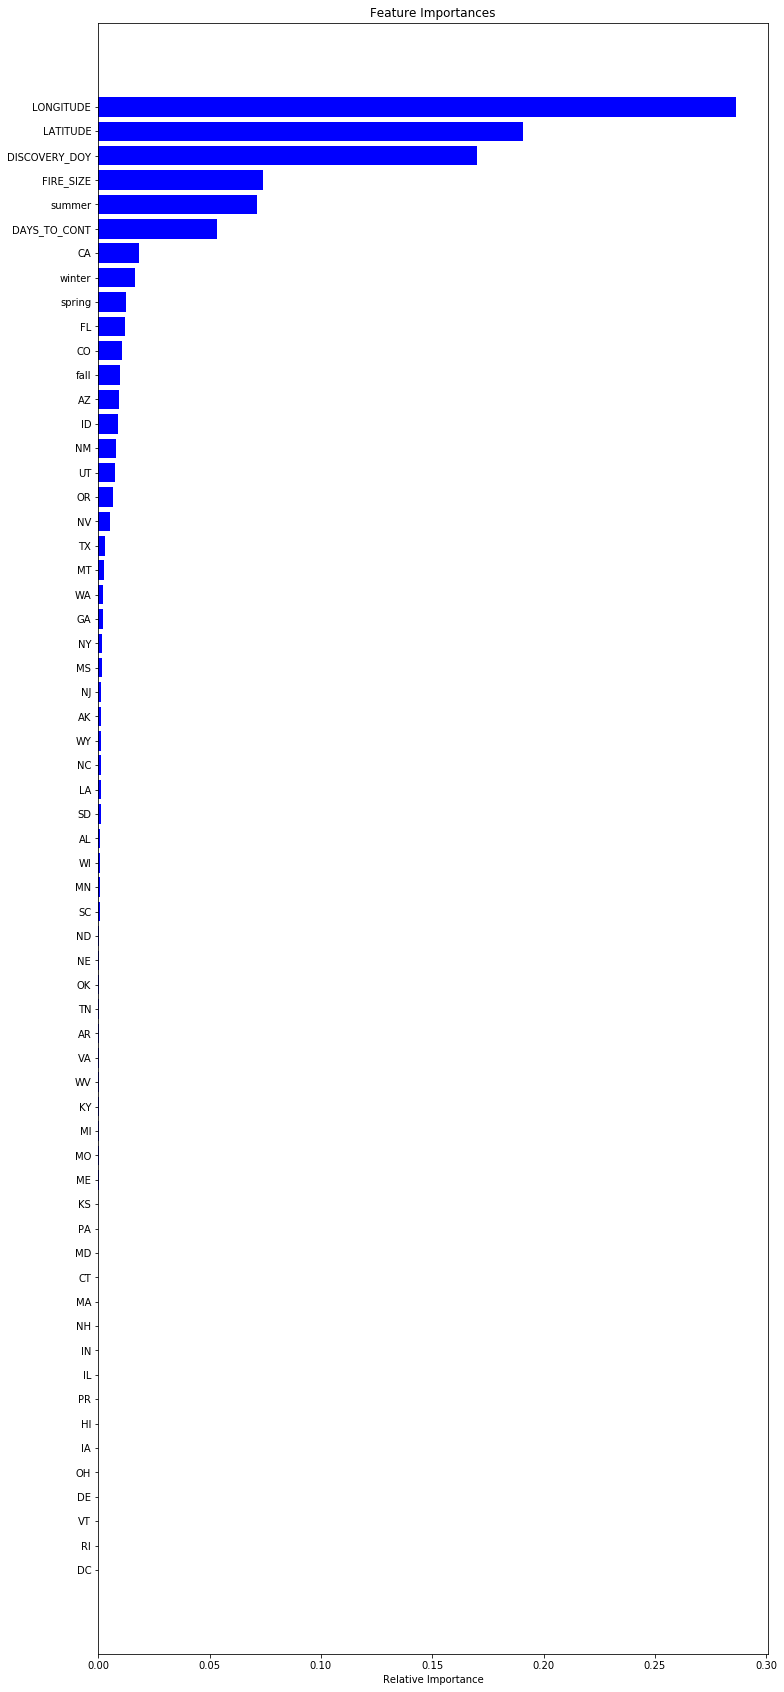

In [60]:
importances = randomforest.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,30))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_val_rf.columns[i] for i in indices])
plt.xlabel('Relative Importance');

#### Ensembling

In [61]:
xg = xgb.XGBClassifier()


xg.fit(X_train_rf, y_train_rf)
xg.score(X_val_rf, y_val_rf)

y_predict_xg = xg.predict(X_val_rf)

print(precision_score(y_val_rf, y_predict_xg), recall_score(y_val_rf, y_predict_xg))

print("\n XGBoost confusion matrix: \n\n", confusion_matrix(y_val_rf, randomforest.predict(X_val_rf)))

0.9215399843891038 0.9515648990729025

 XGBoost confusion matrix: 

 [[ 43575  12274]
 [  8227 213864]]


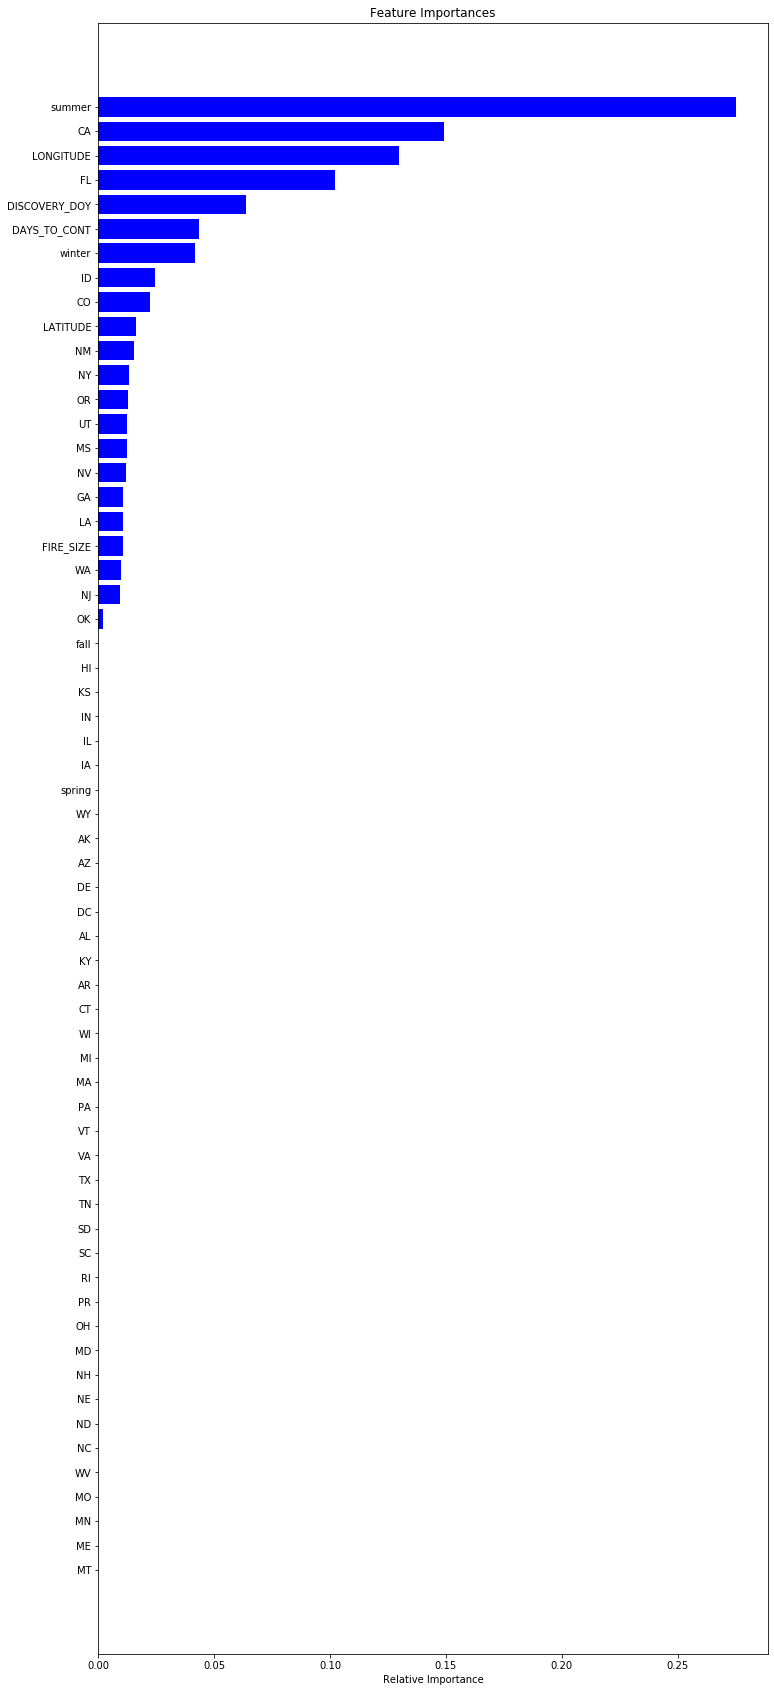

In [62]:
importances = xg.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,30))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_val_rf.columns[i] for i in indices])
plt.xlabel('Relative Importance');

#### ROC Plots

ROC AUC score RandomForest =  0.961363771208168
ROC AUC score Logistic =  0.9089595896582967
ROC AUC score NB Gaussian =  0.8953529305011954
ROC AUC score NB Bernoulli =  0.9002519025603186
ROC AUC score Decision Tree =  0.9016450942692196
ROC AUC score XGBoost =  0.9367594183346806


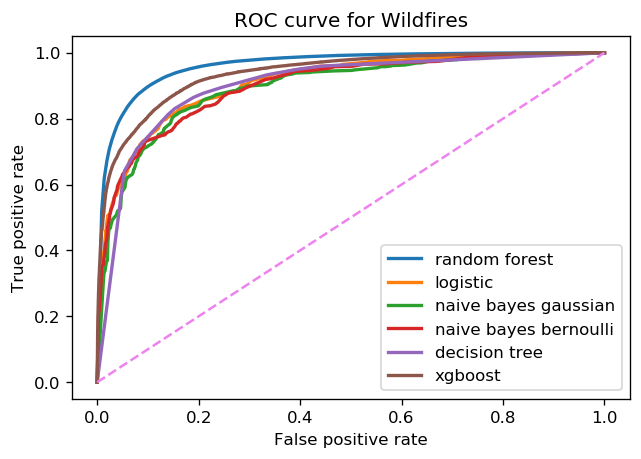

In [63]:
fpr, tpr, thresholds = roc_curve(y_val_rf, randomforest.predict_proba(X_val_rf)[:,1])
fpr_l, tpr_l, thresholds_l = roc_curve(y_val_lr, logit.predict_proba(X_val_lr)[:,1])
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_val_lr, nb.predict_proba(X_val_lr)[:,1])
fpr_nbb, tpr_nbb, thresholds_nbb = roc_curve(y_val_lr, nb_B.predict_proba(X_val_lr)[:,1])
fpr_d, tpr_d, thresholds_d = roc_curve(y_val_rf, decisiontree.predict_proba(X_val_rf)[:,1])
fpr_x, tpr_x, thresholds_x = roc_curve(y_val_rf, xg.predict_proba(X_val_rf)[:,1])

plt.figure(dpi=120)
plt.plot(fpr, tpr,lw=2, label = 'random forest')
plt.plot(fpr_l, tpr_l,lw=2, label = 'logistic')
plt.plot(fpr_nb, tpr_nb,lw=2, label = 'naive bayes gaussian')
plt.plot(fpr_nbb, tpr_nbb,lw=2, label = 'naive bayes bernoulli')
plt.plot(fpr_d, tpr_d,lw=2, label = 'decision tree')
plt.plot(fpr_x, tpr_x,lw=2, label = 'xgboost')
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.legend(loc = 'lower right')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Wildfires');
print("ROC AUC score RandomForest = ", roc_auc_score(y_val_rf, randomforest.predict_proba(X_val_rf)[:,1]))
print("ROC AUC score Logistic = ", roc_auc_score(y_val_lr, logit.predict_proba(X_val_lr)[:,1]))
print("ROC AUC score NB Gaussian = ", roc_auc_score(y_val_lr, nb.predict_proba(X_val_lr)[:,1]))
print("ROC AUC score NB Bernoulli = ", roc_auc_score(y_val_lr, nb_B.predict_proba(X_val_lr)[:,1]))
print("ROC AUC score Decision Tree = ", roc_auc_score(y_val_rf, decisiontree.predict_proba(X_val_rf)[:,1]))
print("ROC AUC score XGBoost = ", roc_auc_score(y_val_rf, xg.predict_proba(X_val_rf)[:,1]))

#### Looking at ROC Curves --Random Forest is the best

In [51]:
randomforest.predict_proba(X_val_rf.head(5))

array([[0.5 , 0.5 ],
       [0.02, 0.98],
       [0.08, 0.92],
       [0.41, 0.59],
       [0.95, 0.05]])

In [64]:
randomforest.

array([0, 1])

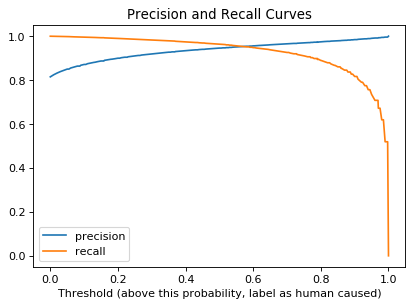

In [65]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_val_rf, randomforest.predict_proba(X_val_rf)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as human caused)');
plt.title('Precision and Recall Curves');

In [70]:
threshold = 0.4

predicted_proba = randomforest.predict_proba(X_val_rf)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

recall = recall_score(y_val_rf, predicted)

In [71]:
recall

0.9748616558077545